---

In [1]:
# Import library

import tensorflow as tf
import matplotlib.pyplot as plt
import collections
import random
import numpy as np
import os
import time
import json
from pprint import pprint
from PIL import Image
import zipfile


global_seed = 123
np.random.seed(global_seed)
tf.random.set_seed(global_seed)

2023-10-25 10:59:03.351841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Extract data from zip file

image_zip_path = 'train2014.zip'
target_folder = './'
with zipfile.ZipFile(image_zip_path, 'r') as zip_ref:
    zip_ref.extractall(target_folder)

In [3]:
# Define all image paths

image_folder = './train2014/'

training_images = [fn for fn in os.listdir(image_folder) if fn.endswith('jpg')]
train_image_paths = [image_folder + s for s in training_images]
print(train_image_paths[0:5],'\n')
print(len(train_image_paths))

['./train2014/COCO_train2014_000000019725.jpg', './train2014/COCO_train2014_000000010701.jpg', './train2014/COCO_train2014_000000036739.jpg', './train2014/COCO_train2014_000000016166.jpg', './train2014/COCO_train2014_000000043629.jpg'] 

500


In [4]:
# Load annotation of the images

annotation_folder = './annotations/'
annotation_file = annotation_folder + 'captions_train2014.json'

with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [5]:
annotations

{'info': {'description': 'COCO 2014 Dataset',
  'url': 'http://cocodataset.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'COCO Consortium',
  'date_created': '2017/09/01'},
 'images': [{'license': 5,
   'file_name': 'COCO_train2014_000000057870.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 16:28:13',
   'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
   'id': 57870},
  {'license': 5,
   'file_name': 'COCO_train2014_000000384029.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000384029.jpg',
   'height': 429,
   'width': 640,
   'date_captured': '2013-11-14 16:29:45',
   'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
   'id': 384029},
  {'license': 1,
   'file_name': 'COCO_train2014_000000222016.jpg',
   'coco_url': 'http://images.cocodataset.org/train2014/COCO_tr

In [6]:
annotations['annotations']

[{'image_id': 318556,
  'id': 48,
  'caption': 'A very clean and well decorated empty bathroom'},
 {'image_id': 116100,
  'id': 67,
  'caption': 'A panoramic view of a kitchen and all of its appliances.'},
 {'image_id': 318556,
  'id': 126,
  'caption': 'A blue and white bathroom with butterfly themed wall tiles.'},
 {'image_id': 116100,
  'id': 148,
  'caption': 'A panoramic photo of a kitchen and dining room'},
 {'image_id': 379340,
  'id': 173,
  'caption': 'A graffiti-ed stop sign across the street from a red car '},
 {'image_id': 379340,
  'id': 188,
  'caption': 'A vandalized stop sign and a red beetle on the road'},
 {'image_id': 318556,
  'id': 219,
  'caption': 'A bathroom with a border of butterflies and blue paint on the walls above it.'},
 {'image_id': 318556,
  'id': 255,
  'caption': 'An angled view of a beautifully decorated bathroom.'},
 {'image_id': 134754,
  'id': 272,
  'caption': 'The two people are walking down the beach.'},
 {'image_id': 538480,
  'id': 288,
  'ca

In [7]:
# Create dictionary that pairs image path and its caption
# Note every image has 5 or 6 captions

image_path_to_caption = collections.defaultdict(list)

for val in annotations['annotations']: 
    caption = f"<start> {val['caption']} <end>"
    image_path = image_folder + 'COCO_train2014_' + '%012d.jpg' % (val['image_id'])
    image_path_to_caption[image_path].append(caption)

pprint(image_path)
print('\n')
pprint(image_path_to_caption[image_path])

'./train2014/COCO_train2014_000000133071.jpg'


['<start> Bread, sour cream, and guacamole are arrayed on a plate with a lemon '
 'slice. <end>',
 '<start> A white plate of food on a dining table. <end>',
 '<start> a slice of bread is covered with a sour cream and quacamole <end>',
 '<start> White Plate with a lot of guacamole and an extra large dollop of '
 'sour cream over meat <end>',
 '<start> A dinner plate has a lemon wedge garnishment. <end>']


2501
2501


['<start> a white yellow and blue bus its driver and some trees <end>',
 '<start> A city bus going down a city street. <end>',
 '<start> White, yellow, and baby blue bus driving on a tree-lined city '
 'street. <end>',
 '<start> A large bus on a open city street. <end>',
 '<start> A huge bus rolls down the partially shaded street. <end>']


['./train2014/COCO_train2014_000000019725.jpg',
 './train2014/COCO_train2014_000000019725.jpg',
 './train2014/COCO_train2014_000000019725.jpg',
 './train2014/COCO_train2014_000000019725.jpg',
 './train2014/COCO_train2014_000000019725.jpg']




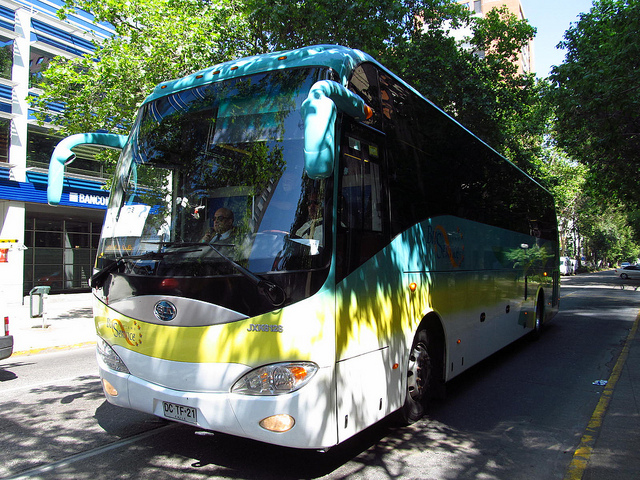

In [8]:
# Convert dict image_path:caption into list

train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list)) # replicate 'number of captions' times the image paths 

print(len(train_captions))
print(len(img_name_vector))
print('\n')

pprint(train_captions[0:5])
print('\n')
pprint(img_name_vector[0:5])
print('\n')
Image.open(img_name_vector[0])

In [9]:
# Resize image to 299px by 299px and scale pixels into between -1 and 1 to fit with Inception V3 model

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)
    return img, image_path

In [10]:
# Get output from last convolutional layer inceptionV3 to get image feature vectors

image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
new_input = image_model.input
hidden_layer = image_model.layers[-1].output

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)

In [11]:
from tqdm import tqdm

def feat_extraction():
    # Get unique images
    encode_train = sorted(set(img_name_vector))

    # Convert to tf dataset
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
    
    # Parallelize feature extraction process
    image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # Feature extraction
    for img, path in tqdm(image_dataset):
        batch_features = image_features_extract_model(img) 
        
        # Convert batch_features shape from [batch_size, H, W, C] to [batch_size, HxW, C]
        batch_features = tf.reshape(batch_features,
                                  (batch_features.shape[0], -1, batch_features.shape[3]))

        #save extracted features to hard disk
        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8")
            np.save(path_of_feature, bf.numpy())

In [12]:
feat_extraction()  

  0%|                                                                                                                                     | 0/32 [00:00<?, ?it/s]2023-10-25 11:16:26.509335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [500]
	 [[{{node Placeholder/_0}}]]
Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [02:03<00:00,  3.85s/it]


In [13]:
# Limit dataset into 5000 images
top_k = 5000

# Handle out of vocabulary token
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
# Train the tokenizer
tokenizer.fit_on_texts(train_captions)

In [14]:
# Add padding to word2idx and idx2word 

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

In [16]:
train_captions[0:5]

['<start> a white yellow and blue bus its driver and some trees <end>',
 '<start> A city bus going down a city street. <end>',
 '<start> White, yellow, and baby blue bus driving on a tree-lined city street. <end>',
 '<start> A large bus on a open city street. <end>',
 '<start> A huge bus rolls down the partially shaded street. <end>']

In [15]:
# Tokenize caption
train_seqs = tokenizer.texts_to_sequences(train_captions)

pprint(list(tokenizer.index_word.items())[:10])
print('\n')
pprint(train_seqs[:5])

[(1, '<unk>'),
 (2, 'a'),
 (3, '<start>'),
 (4, '<end>'),
 (5, 'on'),
 (6, 'of'),
 (7, 'the'),
 (8, 'in'),
 (9, 'with'),
 (10, 'and')]


[[3, 2, 18, 113, 10, 49, 63, 160, 1282, 10, 33, 98, 4],
 [3, 2, 88, 63, 370, 27, 2, 88, 26, 4],
 [3, 18, 113, 10, 270, 49, 63, 170, 5, 2, 108, 622, 88, 26, 4],
 [3, 2, 32, 63, 5, 2, 99, 88, 26, 4],
 [3, 2, 489, 63, 933, 27, 7, 729, 934, 26, 4]]


In [17]:
# Add padding token
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

In [18]:
cap_vector[0:5]

array([[   3,    2,   18,  113,   10,   49,   63,  160, 1282,   10,   33,
          98,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    2,   88,   63,  370,   27,    2,   88,   26,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,   18,  113,   10,  270,   49,   63,  170,    5,    2,  108,
         622,   88,   26,    4,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    2,   32,   63,    5,    2,   99,   88,   26,    4,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   3,    2,  489,   63,  933,   27,    7,  7

In [19]:
# Calculates the max_length, which is used to store the attention weights

def calc_max_length(tensor):
    return max(len(t) for t in tensor)

max_length = calc_max_length(train_seqs)
print(max_length)

34


In [20]:
image_path_to_caption

defaultdict(list,
            {'./train2014/COCO_train2014_000000318556.jpg': ['<start> A very clean and well decorated empty bathroom <end>',
              '<start> A blue and white bathroom with butterfly themed wall tiles. <end>',
              '<start> A bathroom with a border of butterflies and blue paint on the walls above it. <end>',
              '<start> An angled view of a beautifully decorated bathroom. <end>',
              '<start> A clock that blends in with the wall hangs in a bathroom.  <end>'],
             './train2014/COCO_train2014_000000116100.jpg': ['<start> A panoramic view of a kitchen and all of its appliances. <end>',
              '<start> A panoramic photo of a kitchen and dining room <end>',
              '<start> A wide angle view of the kitchen work area <end>',
              '<start> multiple photos of a brown and white kitchen.  <end>',
              '<start> A kitchen that has a checkered patterned floor and white cabinets. <end>'],
             './tra

In [21]:
# Create image_path:caption_vector dictionary

img_to_cap_vector = collections.defaultdict(list)
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)
    
img_to_cap_vector

defaultdict(list,
            {'./train2014/COCO_train2014_000000019725.jpg': [array([   3,    2,   18,  113,   10,   49,   63,  160, 1282,   10,   33,
                       98,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                        0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
                        0], dtype=int32),
              array([  3,   2,  88,  63, 370,  27,   2,  88,  26,   4,   0,   0,   0,
                       0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                       0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
              array([  3,  18, 113,  10, 270,  49,  63, 170,   5,   2, 108, 622,  88,
                      26,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
                       0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
              array([ 3,  2, 32, 63,  5,  2, 99, 88, 26,  4,  0,  0,  0,  0,  0,  0,  0,
                      0,  0,  0,  0,  0,  0,  0

In [22]:
# Shuffle dataset
img_keys = list(img_to_cap_vector.keys())
random.shuffle(img_keys)

# Get idx for train test split
slice_index = int(len(img_keys)*0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

# Create train data
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

# Create val data
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

In [23]:
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)

(2001, 2001, 500, 500)

In [24]:
pprint(img_name_train[0:5])
print('\n')
pprint(cap_train[0:5])

['./train2014/COCO_train2014_000000007746.jpg',
 './train2014/COCO_train2014_000000007746.jpg',
 './train2014/COCO_train2014_000000007746.jpg',
 './train2014/COCO_train2014_000000007746.jpg',
 './train2014/COCO_train2014_000000007746.jpg']


[array([   3, 1590,    6,  325, 1591,   22, 1592,    5,    2,   29,    4,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32),
 array([  3,   2,  29,  28,  82, 134, 523,   6, 524,   5,  35,   4,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([  3,   2,  25, 187,   2, 185,   6, 524, 102,   2,  30,   4,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([  3,  58,  11,   2,  30,   6,  84,  28,  82, 837, 666,   4,   0,
         0,   0,   0,  

In [25]:
pprint(img_name_val[0:5])
print('\n')
pprint(cap_val[0:5])

['./train2014/COCO_train2014_000000000595.jpg',
 './train2014/COCO_train2014_000000000595.jpg',
 './train2014/COCO_train2014_000000000595.jpg',
 './train2014/COCO_train2014_000000000595.jpg',
 './train2014/COCO_train2014_000000000595.jpg']


[array([   3,    2,  285,   14,   23,   13,    2,  397,    9,    2, 1954,
        360,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32),
 array([  3,   2, 327,  14,   8,   7, 171,   6,   2, 397,   4,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0], dtype=int32),
 array([   3,   58,   11,   16,  152,  285,    8,    7,  171,    6,    2,
       1955,    4,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32),
 array([  3,  16, 152, 285, 470,  73,   8,   7, 171,   

In [27]:
# Convert train dataset from list to tf Dataset
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# Load the numpy files
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

BATCH_SIZE = 64
BUFFER_SIZE = 1000

# Use map to load the numpy files in parallel
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Shuffle and batch
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [28]:
# Create attention function

units = 256 
embedding_dim = 64 

class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)
        self.W2 = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, features, hidden):
        # features(CNN_encoder output) shape == (batch_size, 64, embedding_dim)

        # hidden shape == (batch_size, hidden_size)
        # hidden_with_time_axis shape == (batch_size, 1, hidden_size)
        hidden_with_time_axis = tf.expand_dims(hidden, 1)

        # attention_hidden_layer shape == (batch_size, 64, units)
        attention_hidden_layer = (tf.nn.tanh(self.W1(features) +
                                             self.W2(hidden_with_time_axis)))

        # score shape == (batch_size, 64, 1)
        # This gives you an unnormalized score for each image feature.
        score = self.V(attention_hidden_layer)

        # attention_weights shape == (batch_size, 64, 1)
        attention_weights = tf.nn.softmax(score, axis=1)

        # context_vector shape after sum == (batch_size, hidden_size)
        context_vector = attention_weights * features  # (batch_size, 64, 1) * (batch_size, 64, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector, attention_weights

- <b> embedding_dim </b> in the context of this attention mechanism doesn't refer to the typical embedding dimension of word vectors. Instead, it refers to the depth or number of channels of the feature vectors extracted from the CNN encoder for each spatial location.
-  <b>hidden_size </b> is the size or length of this hidden state. It dictates how much information the RNN can store at each step in its internal state.

![Image Description](https://raw.githubusercontent.com/yunjey/pytorch-tutorial/master/tutorials/03-advanced/image_captioning/png/model.png)


In [29]:
class CNN_Encoder(tf.keras.Model):
    # Since you have already extracted the features and dumped it
    # This encoder passes those features through a Fully connected layer
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # shape after fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)
        x = tf.nn.relu(x)
        return x

In [30]:
vocab_size = top_k + 1

class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')
        self.fc1 = tf.keras.layers.Dense(self.units)
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # defining attention as a separate model
        context_vector, attention_weights = self.attention(features, hidden)

        # x shape after passing through embedding == (batch_size, 1, embedding_dim)
        x = self.embedding(x)

        # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

        # passing the concatenated vector to the GRU
        output, state = self.gru(x)

        # shape == (batch_size, max_length, hidden_size)
        x = self.fc1(output)

        # x shape == (batch_size * max_length, hidden_size)
        x = tf.reshape(x, (-1, x.shape[2]))

        # output shape == (batch_size * max_length, vocab)
        x = self.fc2(x)

        return x, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [31]:
encoder = CNN_Encoder(embedding_dim)
decoder = RNN_Decoder(embedding_dim, units, vocab_size)

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

loss_plot = []

In [33]:
@tf.autograph.experimental.do_not_convert
def train_step(img_tensor, target):
    loss = 0

    # initializing the hidden state for each batch
    # because the captions are not related from image to image
    hidden = decoder.reset_state(batch_size=target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)

    with tf.GradientTape() as tape:
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # passing the features through the decoder
            predictions, hidden, _ = decoder(dec_input, features, hidden)

            loss += loss_function(target[:, i], predictions)

            # using teacher forcing
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

In [35]:
# Training model

EPOCHS = 5
num_steps = len(img_name_train) // BATCH_SIZE

for epoch in range(0, EPOCHS):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 10 == 0:
            average_batch_loss = batch_loss.numpy()/int(target.shape[1])
            print(f'Epoch {epoch+1} Batch {batch} Loss {average_batch_loss:.4f}')
    # storing the epoch end loss value to plot later
    loss_plot.append(total_loss / num_steps)

    print(f'Epoch {epoch+1} Loss {total_loss/num_steps:.6f}')
    print(f'Time taken for 1 epoch {time.time()-start:.2f} sec\n')

Epoch 1 Batch 0 Loss 1.8062
Epoch 1 Batch 10 Loss 1.8690
Epoch 1 Batch 20 Loss 1.8361
Epoch 1 Batch 30 Loss 1.9777
Epoch 1 Loss 1.894621
Time taken for 1 epoch 72.72 sec

Epoch 2 Batch 0 Loss 1.8391
Epoch 2 Batch 10 Loss 1.7553
Epoch 2 Batch 20 Loss 1.7783
Epoch 2 Batch 30 Loss 1.7127
Epoch 2 Loss 1.829720
Time taken for 1 epoch 72.22 sec

Epoch 3 Batch 0 Loss 1.6438
Epoch 3 Batch 10 Loss 1.6447
Epoch 3 Batch 20 Loss 1.6857
Epoch 3 Batch 30 Loss 1.6089
Epoch 3 Loss 1.714057
Time taken for 1 epoch 73.29 sec

Epoch 4 Batch 0 Loss 1.6171
Epoch 4 Batch 10 Loss 1.5473
Epoch 4 Batch 20 Loss 1.5462
Epoch 4 Batch 30 Loss 1.5798
Epoch 4 Loss 1.610186
Time taken for 1 epoch 70.55 sec

Epoch 5 Batch 0 Loss 1.5847
Epoch 5 Batch 10 Loss 1.4169
Epoch 5 Batch 20 Loss 1.4321
Epoch 5 Batch 30 Loss 1.4341
Epoch 5 Loss 1.532041
Time taken for 1 epoch 73.77 sec



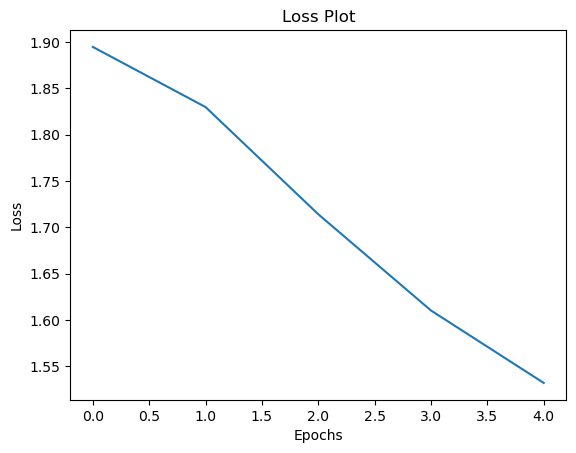

In [36]:
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

In [37]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val) # get the 2D context

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot

It's essential to understand the difference between "randomly selecting a word" and "randomly sampling based on a distribution."

When you use tf.random.categorical(predictions, 1), you're not making a uniform random choice across all words. Instead, you are:

Sampling Based on Predicted Probabilities: The word choices are driven by the predictions distribution. Words with higher probabilities are more likely to be selected, while words with low probabilities are less likely.

Adding Stochasticity: By sampling, you introduce stochasticity, but it's guided stochasticity. If the model is 90% sure about a word, that word has a 90% chance of being selected.

In [38]:
def plot_attention(image, result, attention_plot):
    temp_image = np.array(Image.open(image))

    fig = plt.figure(figsize=(15, 15))  # Increase the figure size

    len_result = len(result)
    for i in range(len_result):
        temp_att = np.resize(attention_plot[i], (8, 8))
        grid_size = int(max(np.ceil(len_result/2), 2))
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.set_title(result[i])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()


Real Caption: <start> a tennis player is holding a racket on the tennis court <end>
Prediction Caption: grass on an street in sheeps <end>


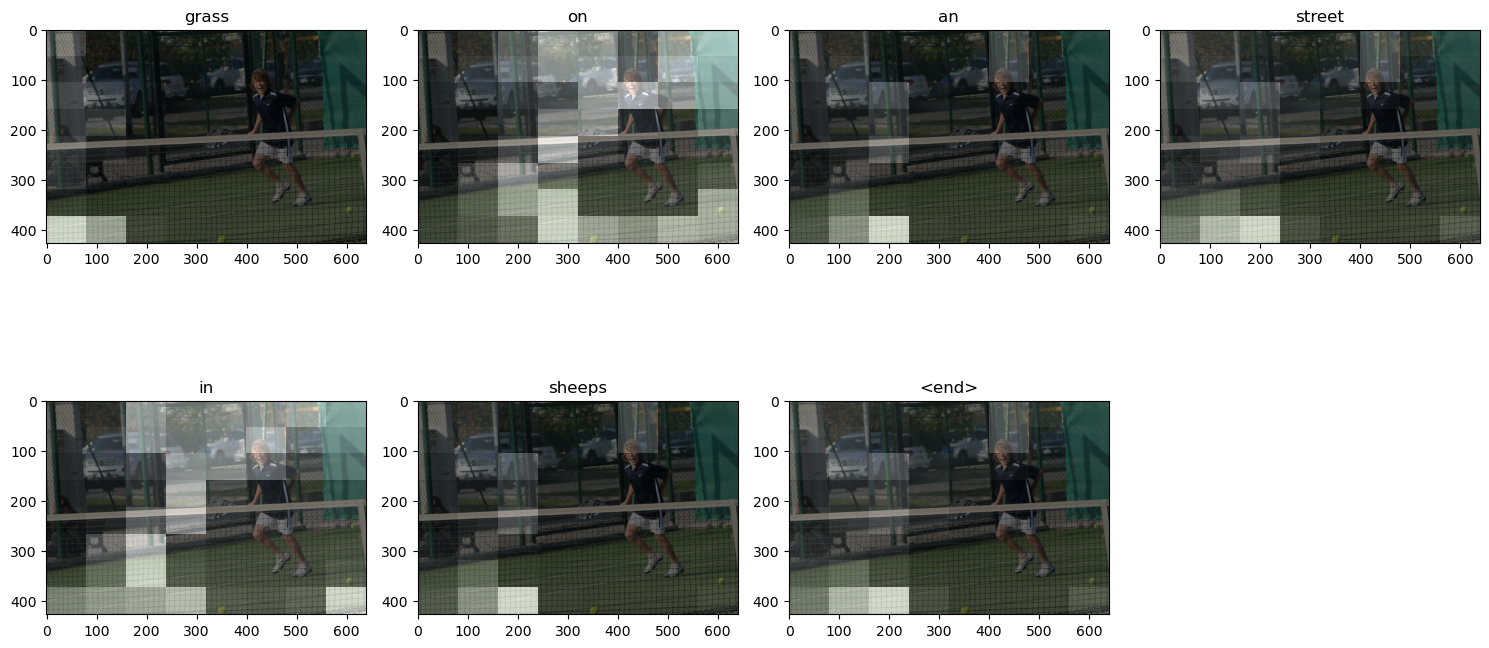

In [42]:
# captions on the validation set
attention_features_shape = 64

rid = np.random.randint(0, len(img_name_val))
image = img_name_val[rid]
real_caption = ' '.join([tokenizer.index_word[i]
                        for i in cap_val[rid] if i not in [0]])
result, attention_plot = evaluate(image)

print('Real Caption:', real_caption)
print('Prediction Caption:', ' '.join(result))
plot_attention(image, result, attention_plot)